# Q1 — Intensity Transformation
Implement the given mapping and apply to the provided image.

In [19]:

import numpy as np, cv2 as cv, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data"); 
RESULTS = Path("../results/q1"); 
RESULTS.mkdir(parents=True, exist_ok=True)

img_path = DATA / "a1images" / "emma.jpg"  # place the image here
img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
assert img is not None, f"Image not found at {img_path}"
print("Input shape:", img.shape)


Input shape: (810, 720)


In [20]:

# Initialize LUT
lut = np.zeros(256, dtype=np.uint8)

# Segment 1: 0 → 50 input → 0 → 50 output
lut[0:51] = np.linspace(0, 50, 51).astype(np.uint8)

# Segment 2: 50 → 150 input → 100 → 255 output
lut[51:151] = np.linspace(100, 255, 100).astype(np.uint8)

# Force the drop at exactly 150 → 150
lut[150] = 150

# Segment 3: 150 → 255 input → 150 → 255 output
lut[151:256] = np.linspace(150, 255, 105).astype(np.uint8)

# Apply LUT
out = cv.LUT(img, lut)

# Save outputs
cv.imwrite(str(RESULTS/"q1_output.png"), out)

True

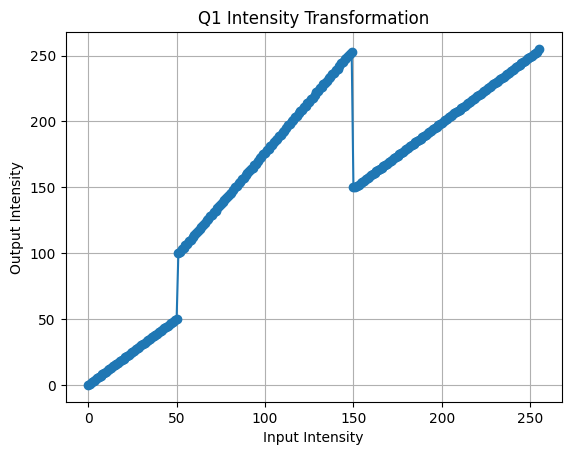

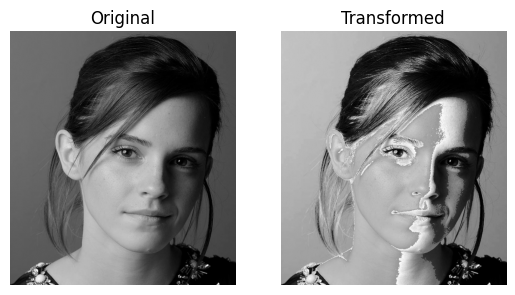

In [21]:

# Plot the transform curve
plt.figure()
plt.plot(range(256), lut, marker='o')
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Q1 Intensity Transformation")
plt.grid(True)
plt.savefig(RESULTS/"q1_transform_curve.png", dpi=150)
plt.show()

# Show before/after
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.title("Transformed")
plt.axis('off')
plt.savefig(RESULTS/"q1_before_after.png", dpi=150)
plt.show()